In [ ]:
from typing import Iterable, List, Dict, Callable
import os
import gc

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
PATH_TO_DATA = "/content/drive/MyDrive/Pump Predictive Maintenance/Condition Hydraulic Pump/"
NUMBER_OF_PROFILES = 2205
PROFILE_MAX_SAMPLE_RATE = 6000
TARGET_NAMES = ["cooler", "valve", "leakage", "accumulator", "stable"]

PLOT_STYLE = "darkgrid"

In [ ]:
TARGET_VALUES_MAP = {
    "cooler": {
        3: "close to total failure",
        20: "reduced effifiency",
        100: "full efficiency",
    },
    "valve": {
        100:"optimal switching behavior",
        90: "small lag",
        80: "severe lag",
        73: "close to total failure",
    }, 
    "leakage": {
        0: "no",
	    1: "weak",
	    2: "severe",
    },
    "accumulator": {
        130: "optimal pressure",
    	115: "slightly reduced pressure",
	    100: "severely reduced pressure",
	    90:  "close to total failure",
     },
     "stable":{
        0: "yes",
	    1: "not",
     }
}

In [ ]:
sersor_files_config = [
    {"name": "CE", "upsample_coeff": 100},
    {"name": "CP", "upsample_coeff": 100},
    {"name": "EPS1", "upsample_coeff": 1},
    {"name": "FS1", "upsample_coeff": 10},
    {"name": "FS2", "upsample_coeff": 10},
    {"name": "PS1", "upsample_coeff": 1},
    {"name": "PS2", "upsample_coeff": 1},
    {"name": "PS3", "upsample_coeff": 1},
    {"name": "PS4", "upsample_coeff": 1},
    {"name": "PS5", "upsample_coeff": 1},
    {"name": "PS6", "upsample_coeff": 1},
    {"name": "SE", "upsample_coeff": 100},
    {"name": "TS1", "upsample_coeff": 100},
    {"name": "TS2", "upsample_coeff": 100},
    {"name": "TS3", "upsample_coeff": 100},
    {"name": "TS4", "upsample_coeff": 100},
    {"name": "VS1", "upsample_coeff": 100},
]

In [ ]:
def get_files_with_resample(config: List[Dict]) -> Iterable[np.ndarray]:
    for file in config:
        data = np.genfromtxt(PATH_TO_DATA + file["name"] + ".txt", dtype=float, delimiter='\t')
        yield np.repeat(data, file["upsample_coeff"], axis=1).flatten()

In [ ]:
def load_feature_dataframe(config: List[Dict]) -> pd.DataFrame:
    columns = [file["name"] for file in config]
    data = np.stack(get_files_with_resample(config), axis=-1)
    data_df = pd.DataFrame(data, columns=columns)

    prodile_ids = np.repeat(range(1, NUMBER_OF_PROFILES+1), PROFILE_MAX_SAMPLE_RATE)
    prodile_ids_df = pd.DataFrame(prodile_ids, columns=["profile_id"])

    return pd.concat([prodile_ids_df, data_df], axis=1, sort=False)

In [ ]:
def load_targets(filename: str) -> pd.DataFrame:
    conditions_data = np.genfromtxt(PATH_TO_DATA + filename, dtype=int, delimiter='\t')
    conditions_df = pd.DataFrame(conditions_data, columns=TARGET_NAMES)

    prodile_ids = range(1, NUMBER_OF_PROFILES+1)
    prodile_ids_df = pd.DataFrame(prodile_ids, columns=["cycle_id"])

    return pd.concat([prodile_ids_df, conditions_df], axis=1, sort=False)

In [ ]:
feature_df = load_feature_dataframe(sersor_files_config)
target_df = load_targets("profile.txt") #Note that targets is define for profile, not to points

_ = gc.collect()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
feature_df.head()

,profile_id,CE,CP,EPS1,FS1,FS2,PS1,PS2,PS3,PS4,PS5,PS6,SE,TS1,TS2,TS3,TS4,VS1
0,1,47.202,2.184,2411.6,8.99,10.179,151.47,125.50,2.305,0.0,9.936,9.818,68.039,35.57,40.961,38.32,30.363,0.604
1,1,47.202,2.184,2411.6,8.99,10.179,151.45,125.39,2.305,0.0,9.947,9.823,68.039,35.57,40.961,38.32,30.363,0.604
2,1,47.202,2.184,2411.6,8.99,10.179,151.52,125.40,2.336,0.0,9.964,9.844,68.039,35.57,40.961,38.32,30.363,0.604
3,1,47.202,2.184,2411.6,8.99,10.179,151.27,125.03,2.578,0.0,9.989,9.861,68.039,35.57,40.961,38.32,30.363,0.604
4,1,47.202,2.184,2411.6,8.99,10.179,150.80,124.05,2.977,0.0,9.996,9.877,68.039,35.57,40.961,38.32,30.363,0.604


In [ ]:
target_df.head()


,cycle_id,cooler,valve,leakage,accumulator,stable
0,1,3,100,0,130,1
1,2,3,100,0,130,1
2,3,3,100,0,130,1
3,4,3,100,0,130,1
4,5,3,100,0,130,1


In [ ]:
feature_df.shape

(13230000, 18)

In [ ]:
# Place the DataFrames side by side
data = pd.concat([feature_df, target_df], axis=1)
data

,profile_id,CE,CP,EPS1,FS1,FS2,PS1,PS2,PS3,PS4,PS5,PS6,SE,TS1,TS2,TS3,TS4,VS1,cycle_id,cooler,valve,leakage,accumulator,stable
0,1,47.202,2.184,2411.6,8.990,10.179,151.47,125.50,2.305,0.000,9.936,9.818,68.039,35.570,40.961,38.320,30.363,0.604,1.0,3.0,100.0,0.0,130.0,1.0
1,1,47.202,2.184,2411.6,8.990,10.179,151.45,125.39,2.305,0.000,9.947,9.823,68.039,35.570,40.961,38.320,30.363,0.604,2.0,3.0,100.0,0.0,130.0,1.0
2,1,47.202,2.184,2411.6,8.990,10.179,151.52,125.40,2.336,0.000,9.964,9.844,68.039,35.570,40.961,38.320,30.363,0.604,3.0,3.0,100.0,0.0,130.0,1.0
3,1,47.202,2.184,2411.6,8.990,10.179,151.27,125.03,2.578,0.000,9.989,9.861,68.039,35.570,40.961,38.320,30.363,0.604,4.0,3.0,100.0,0.0,130.0,1.0
4,1,47.202,2.184,2411.6,8.990,10.179,150.80,124.05,2.977,0.000,9.996,9.877,68.039,35.570,40.961,38.320,30.363,0.604,5.0,3.0,100.0,0.0,130.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13229995,2205,46.621,2.148,2416.2,7.774,10.176,151.64,125.73,2.305,10.204,9.989,9.870,68.117,35.426,40.891,38.187,30.375,0.531,NaN,NaN,NaN,NaN,NaN,NaN
13229996,2205,46.621,2.148,2416.6,7.774,10.176,151.70,125.81,2.320,10.238,10.007,9.882,68.117,35.426,40.891,38.187,30.375,0.531,NaN,NaN,NaN,NaN,NaN,NaN
13229997,2205,46.621,2.148,2416.8,7.774,10.176,151.73,125.77,2.273,10.223,10.007,9.886,68.117,35.426,40.891,38.187,30.375,0.531,NaN,NaN,NaN,NaN,NaN,NaN
13229998,2205,46.621,2.148,2417.0,7.774,10.176,151.71,125.66,2.227,10.218,9.988,9.870,68.117,35.426,40.891,38.187,30.375,0.531,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.isnull().sum()

profile_id            0
CE                    0
CP                    0
EPS1                  0
FS1                   0
FS2                   0
PS1                   0
PS2                   0
PS3                   0
PS4                   0
PS5                   0
PS6                   0
SE                    0
TS1                   0
TS2                   0
TS3                   0
TS4                   0
VS1                   0
cycle_id       13227795
cooler         13227795
valve          13227795
leakage        13227795
accumulator    13227795
stable         13227795
dtype: int64

In [ ]:
data.shape

(13230000, 24)

In [ ]:
target_df.isnull().sum()

cycle_id       0
cooler         0
valve          0
leakage        0
accumulator    0
stable         0
dtype: int64

In [ ]:
target_df.shape

(2205, 6)

#New


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import xgboost as xgb
import os

In [ ]:
dir_path = '/content/drive/MyDrive/Pump Predictive Maintenance/Condition Hydraulic Pump/'

In [ ]:
def get_files(dir_path, filename):
    return pd.read_csv(os.path.join(dir_path, filename), sep='\t', header=None)

In [ ]:
pressureFile1 = get_files(dir_path=dir_path, filename='PS1.txt')
pressureFile2 = get_files(dir_path=dir_path, filename='PS2.txt')
pressureFile3 = get_files(dir_path=dir_path, filename='PS3.txt')
pressureFile4 = get_files(dir_path=dir_path, filename='PS4.txt')
pressureFile5 = get_files(dir_path=dir_path, filename='PS5.txt')
pressureFile6 = get_files(dir_path=dir_path, filename='PS6.txt')
volumeFlow1 = get_files(dir_path=dir_path, filename='FS1.txt')
volumeFlow2 = get_files(dir_path=dir_path, filename='FS2.txt')
temperature1 = get_files(dir_path=dir_path, filename='TS1.txt')
temperature2 = get_files(dir_path=dir_path, filename='TS2.txt')
temperature3 = get_files(dir_path=dir_path, filename='TS3.txt')
temperature4 = get_files(dir_path=dir_path, filename='TS4.txt')
pump1 = get_files(dir_path=dir_path, filename='EPS1.txt')
vibration1 = get_files(dir_path=dir_path, filename='VS1.txt')
coolingE1 = get_files(dir_path=dir_path, filename='CE.txt')
coolingP1 = get_files(dir_path=dir_path, filename='CP.txt')
effFactor1 = get_files(dir_path=dir_path, filename='SE.txt')
profile = get_files(dir_path=dir_path, filename='profile.txt')

In [ ]:
y_coolerCondition = pd.DataFrame(profile.iloc[:, 0])
y_valveCondition = pd.DataFrame(profile.iloc[:, 1])
y_pumpLeak = pd.DataFrame(profile.iloc[:, 2])
y_hydraulicAcc = pd.DataFrame(profile.iloc[:, 3])
y_stableFlag = pd.DataFrame(profile.iloc[:, 4])

In [ ]:
#average the cycle data

def mean_conversion(df):
    df1 = pd.DataFrame()
    df1 = df.mean(axis = 1)
    return df1

In [ ]:
PS1 = pd.DataFrame(mean_conversion(pressureFile1))
PS1.columns = ['PS1']

PS2 = pd.DataFrame(mean_conversion(pressureFile2))
PS2.columns = ['PS2']

PS3 = pd.DataFrame(mean_conversion(pressureFile3))
PS3.columns = ['PS3']

PS4 = pd.DataFrame(mean_conversion(pressureFile4))
PS4.columns = ['PS4']

PS5 = pd.DataFrame(mean_conversion(pressureFile5))
PS5.columns = ['PS5']

PS6 = pd.DataFrame(mean_conversion(pressureFile6))
PS6.columns = ['PS6']

FS1 = pd.DataFrame(mean_conversion(volumeFlow1))
FS1.columns = ['FS1']

FS2 = pd.DataFrame(mean_conversion(volumeFlow2))
FS2.columns = ['FS2']

TS1 = pd.DataFrame(mean_conversion(temperature1))
TS1.columns = ['TS1']

TS2 = pd.DataFrame(mean_conversion(temperature2))
TS2.columns = ['TS2']

TS3 = pd.DataFrame(mean_conversion(temperature3))
TS3.columns = ['TS3']

TS4 = pd.DataFrame(mean_conversion(temperature4))
TS4.columns = ['TS4']

P1 = pd.DataFrame(mean_conversion(pump1))
P1.columns = ['P1']

VS1 = pd.DataFrame(mean_conversion(vibration1))
VS1.columns = ['VS1']

CE1 = pd.DataFrame(mean_conversion(coolingE1))
CE1.columns = ['CE1']

CP1 = pd.DataFrame(mean_conversion(coolingP1))
CP1.columns = ['CP1']

SE1 = pd.DataFrame(mean_conversion(effFactor1))
SE1.columns = ['SE1']

In [ ]:
#combine all dataframes

X = pd.concat([PS1, PS2, PS3, PS4, PS5, PS6, FS1, FS2, TS1, TS2, TS3, TS4, P1, VS1, CE1, CP1, SE1], axis=1)

In [ ]:
X.describe()

,PS1,PS2,PS3,PS4,PS5,PS6,FS1,FS2,TS1,TS2,TS3,TS4,P1,VS1,CE1,CP1,SE1
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,160.485315,109.379906,1.753227,2.600266,9.163320,9.079363,6.198549,9.649453,45.424567,50.365979,47.662121,40.735654,2495.509203,0.613315,31.299077,1.808399,55.287900
std,4.699425,4.986585,0.251902,4.279355,0.576296,0.549589,1.032883,0.449246,7.991933,7.396254,7.451888,8.107878,73.836682,0.060260,11.575330,0.278263,8.960189
min,155.391547,104.406307,0.840252,0.000000,8.365800,8.321527,2.018572,8.857513,35.313783,40.859400,38.245733,30.390800,2361.747267,0.524367,17.555983,1.062150,18.276617
25%,158.100195,106.962382,1.729733,0.000000,8.547239,8.487167,6.391670,9.203397,36.237150,41.864183,39.123183,31.272567,2442.933467,0.555100,20.084650,1.550100,56.270183
50%,158.960895,107.730169,1.779631,0.000000,9.115781,9.031516,6.576673,9.692270,44.836650,49.780583,47.070250,40.429050,2480.926633,0.610183,27.392533,1.739683,58.758150
75%,161.000735,109.421612,1.932047,3.503266,9.844351,9.729275,6.657508,10.155008,54.104317,58.584467,55.694433,49.409500,2548.211467,0.649850,46.677383,2.148483,59.656900
max,180.922708,131.589089,2.023398,10.207068,9.978510,9.856591,6.722707,10.403098,57.899283,61.958467,59.423167,53.060417,2740.641000,0.839067,47.903667,2.840100,60.755300


In [ ]:
target_df.describe()

,cycle_id,cooler,valve,leakage,accumulator,stable
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,1103.000000,41.240816,90.693878,0.669388,107.199546,0.342857
std,636.672993,42.383143,10.681802,0.817233,16.435848,0.474772
min,1.000000,3.000000,73.000000,0.000000,90.000000,0.000000
25%,552.000000,3.000000,80.000000,0.000000,90.000000,0.000000
50%,1103.000000,20.000000,100.000000,0.000000,100.000000,0.000000
75%,1654.000000,100.000000,100.000000,1.000000,130.000000,1.000000
max,2205.000000,100.000000,100.000000,2.000000,130.000000,1.000000


In [ ]:
data = pd.concat([PS1, PS2, PS3, PS4, PS5, PS6, FS1, FS2, TS1, TS2, TS3, TS4, P1, VS1, CE1, CP1, SE1], axis=1)

In [ ]:
data=target_df[['cycle_id']]
data = pd.concat([X, target_df], axis=1)
data.head()

,PS1,PS2,PS3,PS4,PS5,PS6,FS1,FS2,TS1,TS2,TS3,TS4,P1,VS1,CE1,CP1,SE1,cycle_id,cooler,valve,leakage,accumulator,stable
0,160.673492,109.466914,1.991475,0.0,9.842170,9.728097,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,2538.929167,0.576950,39.601350,1.862750,59.157183,1,3,100,0,130,1
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,2531.498900,0.565850,25.786433,1.255550,59.335617,2,3,100,0,130,1
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,2519.928000,0.576533,22.218233,1.113217,59.543150,3,3,100,0,130,1
3,160.188088,109.064807,1.946575,0.0,9.438827,9.337430,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,2511.541633,0.569267,20.459817,1.062150,59.794900,4,3,100,0,130,1
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,2503.449500,0.577367,19.787017,1.070467,59.455267,5,3,100,0,130,1


In [ ]:
df = data[['cycle_id', 'date', 'PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6', 'FS1', 'FS2', 'TS1', 'TS2', 'TS3', 'TS4', 'P1', 'VS1', 'CE1', 'CP1', 'SE1', 'cooler', 'valve', 'leakage', 'accumulator', 'stable']]
df.head()

,cycle_id,date,PS1,PS2,PS3,PS4,PS5,PS6,FS1,FS2,TS1,TS2,TS3,TS4,P1,VS1,CE1,CP1,SE1,cooler,valve,leakage,accumulator,stable
0,1,2019-01-01 00:00:00,160.673492,109.466914,1.991475,0.0,9.842170,9.728097,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,2538.929167,0.576950,39.601350,1.862750,59.157183,3,100,0,130,1
1,2,2019-01-01 00:10:00,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,2531.498900,0.565850,25.786433,1.255550,59.335617,3,100,0,130,1
2,3,2019-01-01 00:20:00,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,2519.928000,0.576533,22.218233,1.113217,59.543150,3,100,0,130,1
3,4,2019-01-01 00:30:00,160.188088,109.064807,1.946575,0.0,9.438827,9.337430,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,2511.541633,0.569267,20.459817,1.062150,59.794900,3,100,0,130,1
4,5,2019-01-01 00:40:00,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,2503.449500,0.577367,19.787017,1.070467,59.455267,3,100,0,130,1


In [ ]:
df.describe()

,cycle_id,PS1,PS2,PS3,PS4,PS5,PS6,FS1,FS2,TS1,TS2,TS3,TS4,P1,VS1,CE1,CP1,SE1,cooler,valve,leakage,accumulator,stable
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,1103.000000,160.485315,109.379906,1.753227,2.600266,9.163320,9.079363,6.198549,9.649453,45.424567,50.365979,47.662121,40.735654,2495.509203,0.613315,31.299077,1.808399,55.287900,41.240816,90.693878,0.669388,107.199546,0.342857
std,636.672993,4.699425,4.986585,0.251902,4.279355,0.576296,0.549589,1.032883,0.449246,7.991933,7.396254,7.451888,8.107878,73.836682,0.060260,11.575330,0.278263,8.960189,42.383143,10.681802,0.817233,16.435848,0.474772
min,1.000000,155.391547,104.406307,0.840252,0.000000,8.365800,8.321527,2.018572,8.857513,35.313783,40.859400,38.245733,30.390800,2361.747267,0.524367,17.555983,1.062150,18.276617,3.000000,73.000000,0.000000,90.000000,0.000000
25%,552.000000,158.100195,106.962382,1.729733,0.000000,8.547239,8.487167,6.391670,9.203397,36.237150,41.864183,39.123183,31.272567,2442.933467,0.555100,20.084650,1.550100,56.270183,3.000000,80.000000,0.000000,90.000000,0.000000
50%,1103.000000,158.960895,107.730169,1.779631,0.000000,9.115781,9.031516,6.576673,9.692270,44.836650,49.780583,47.070250,40.429050,2480.926633,0.610183,27.392533,1.739683,58.758150,20.000000,100.000000,0.000000,100.000000,0.000000
75%,1654.000000,161.000735,109.421612,1.932047,3.503266,9.844351,9.729275,6.657508,10.155008,54.104317,58.584467,55.694433,49.409500,2548.211467,0.649850,46.677383,2.148483,59.656900,100.000000,100.000000,1.000000,130.000000,1.000000
max,2205.000000,180.922708,131.589089,2.023398,10.207068,9.978510,9.856591,6.722707,10.403098,57.899283,61.958467,59.423167,53.060417,2740.641000,0.839067,47.903667,2.840100,60.755300,100.000000,100.000000,2.000000,130.000000,1.000000


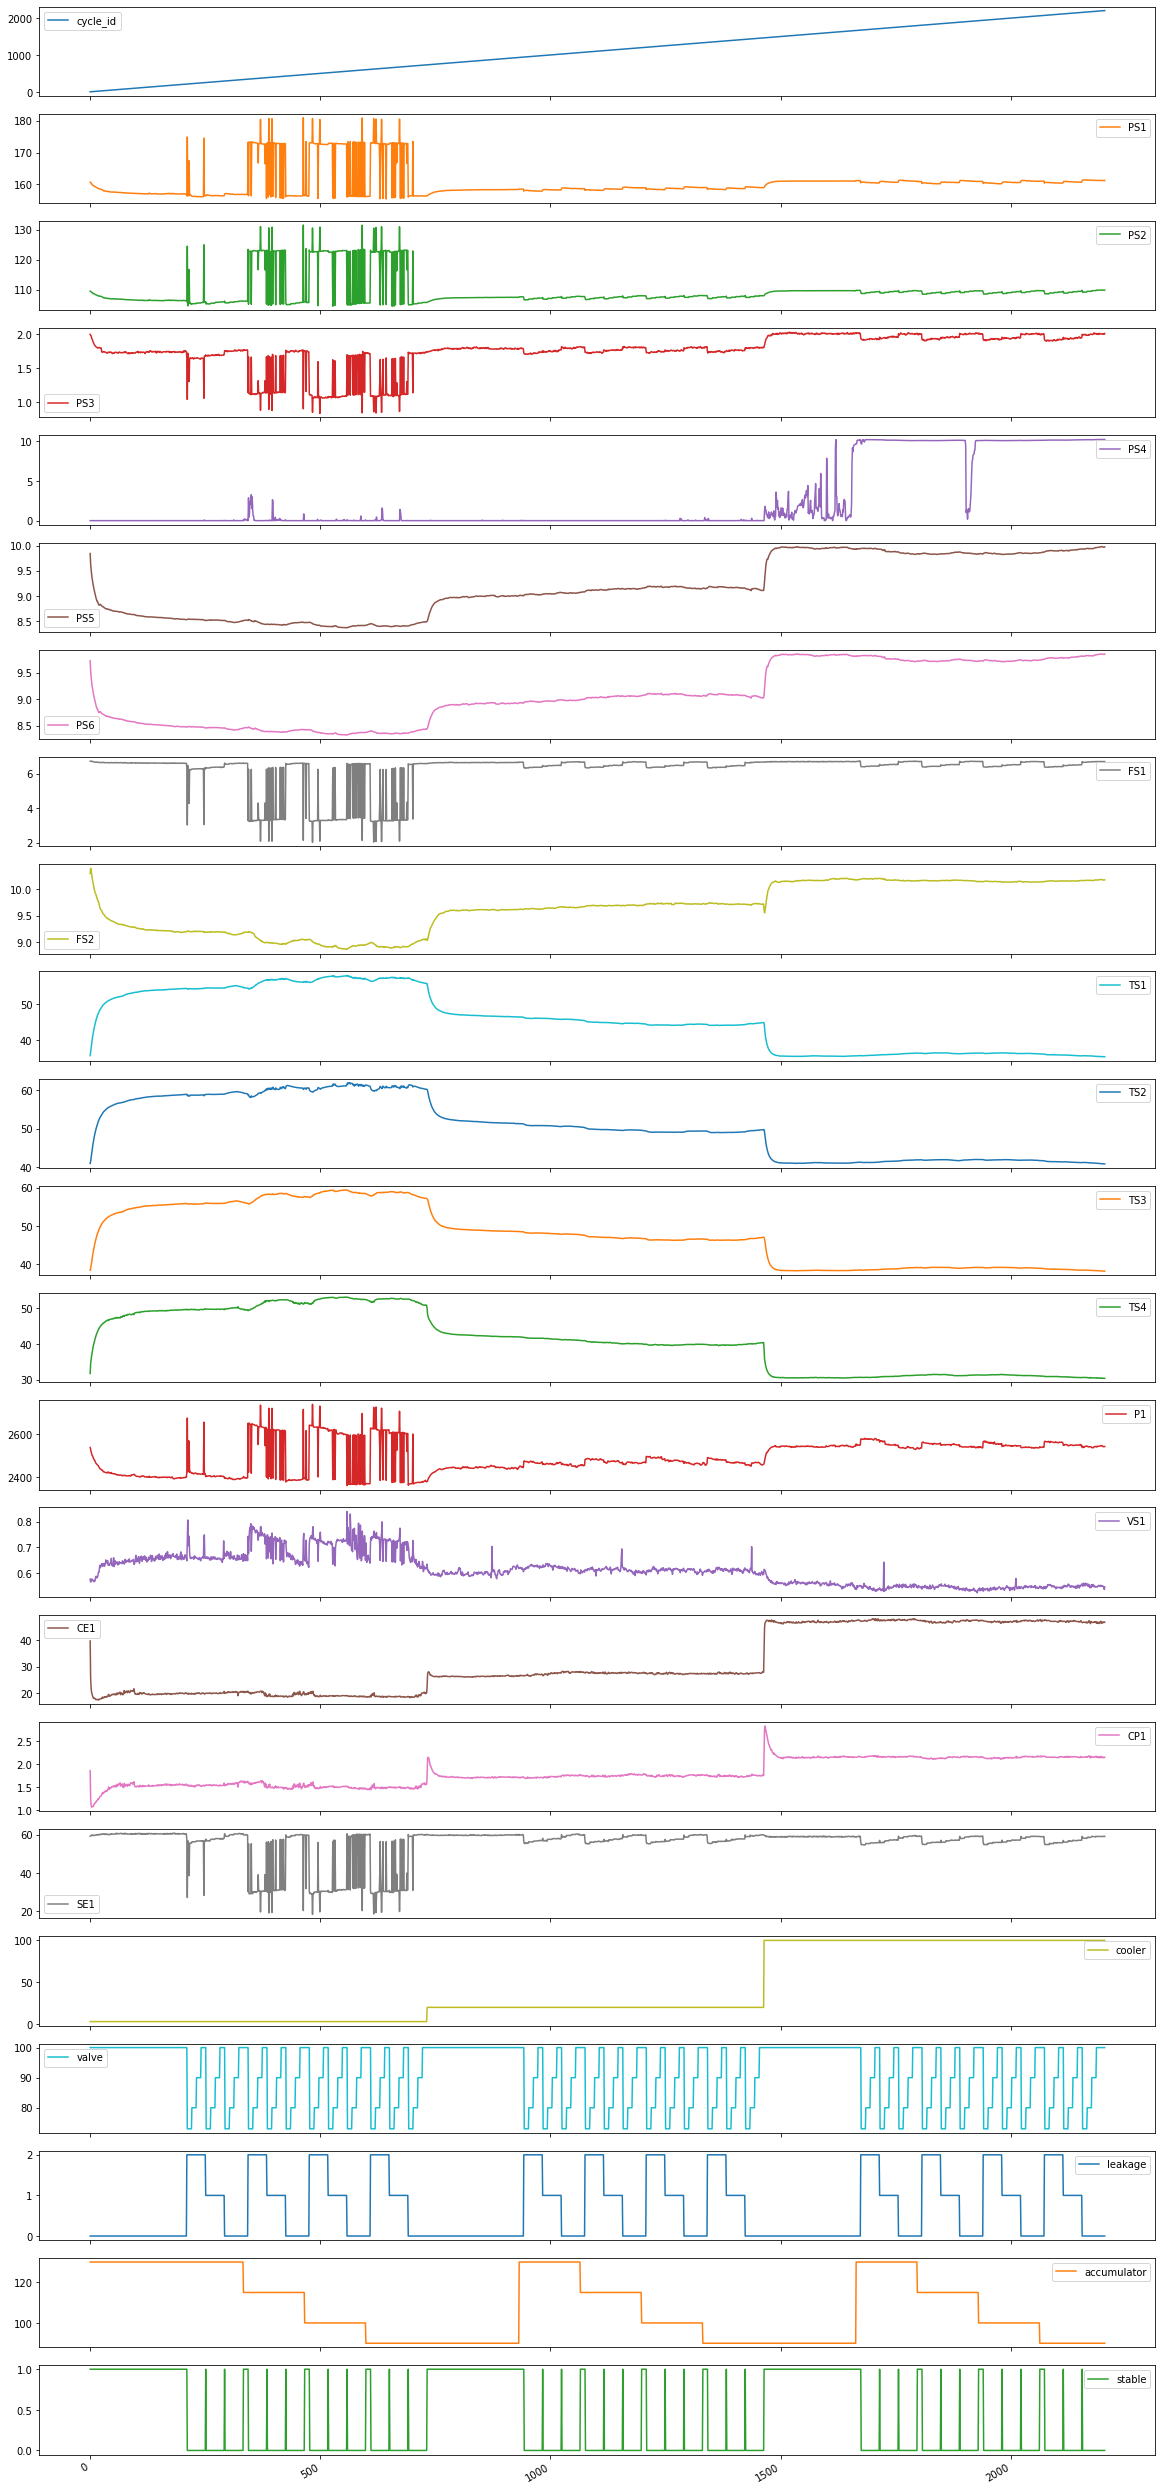

In [ ]:
import matplotlib.pyplot as plt
print(df.plot(subplots =True, sharex = True, figsize = (20,50)))

In [ ]:
data['date'] = pd.date_range('1/1/2019', periods = 2205, freq ='10min') 
data.head()

,PS1,PS2,PS3,PS4,PS5,PS6,FS1,FS2,TS1,TS2,TS3,TS4,P1,VS1,CE1,CP1,SE1,cycle_id,cooler,valve,leakage,accumulator,stable,date
0,160.673492,109.466914,1.991475,0.0,9.842170,9.728097,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,2538.929167,0.576950,39.601350,1.862750,59.157183,1,3,100,0,130,1,2019-01-01 00:00:00
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,2531.498900,0.565850,25.786433,1.255550,59.335617,2,3,100,0,130,1,2019-01-01 00:10:00
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,2519.928000,0.576533,22.218233,1.113217,59.543150,3,3,100,0,130,1,2019-01-01 00:20:00
3,160.188088,109.064807,1.946575,0.0,9.438827,9.337430,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,2511.541633,0.569267,20.459817,1.062150,59.794900,4,3,100,0,130,1,2019-01-01 00:30:00
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,2503.449500,0.577367,19.787017,1.070467,59.455267,5,3,100,0,130,1,2019-01-01 00:40:00


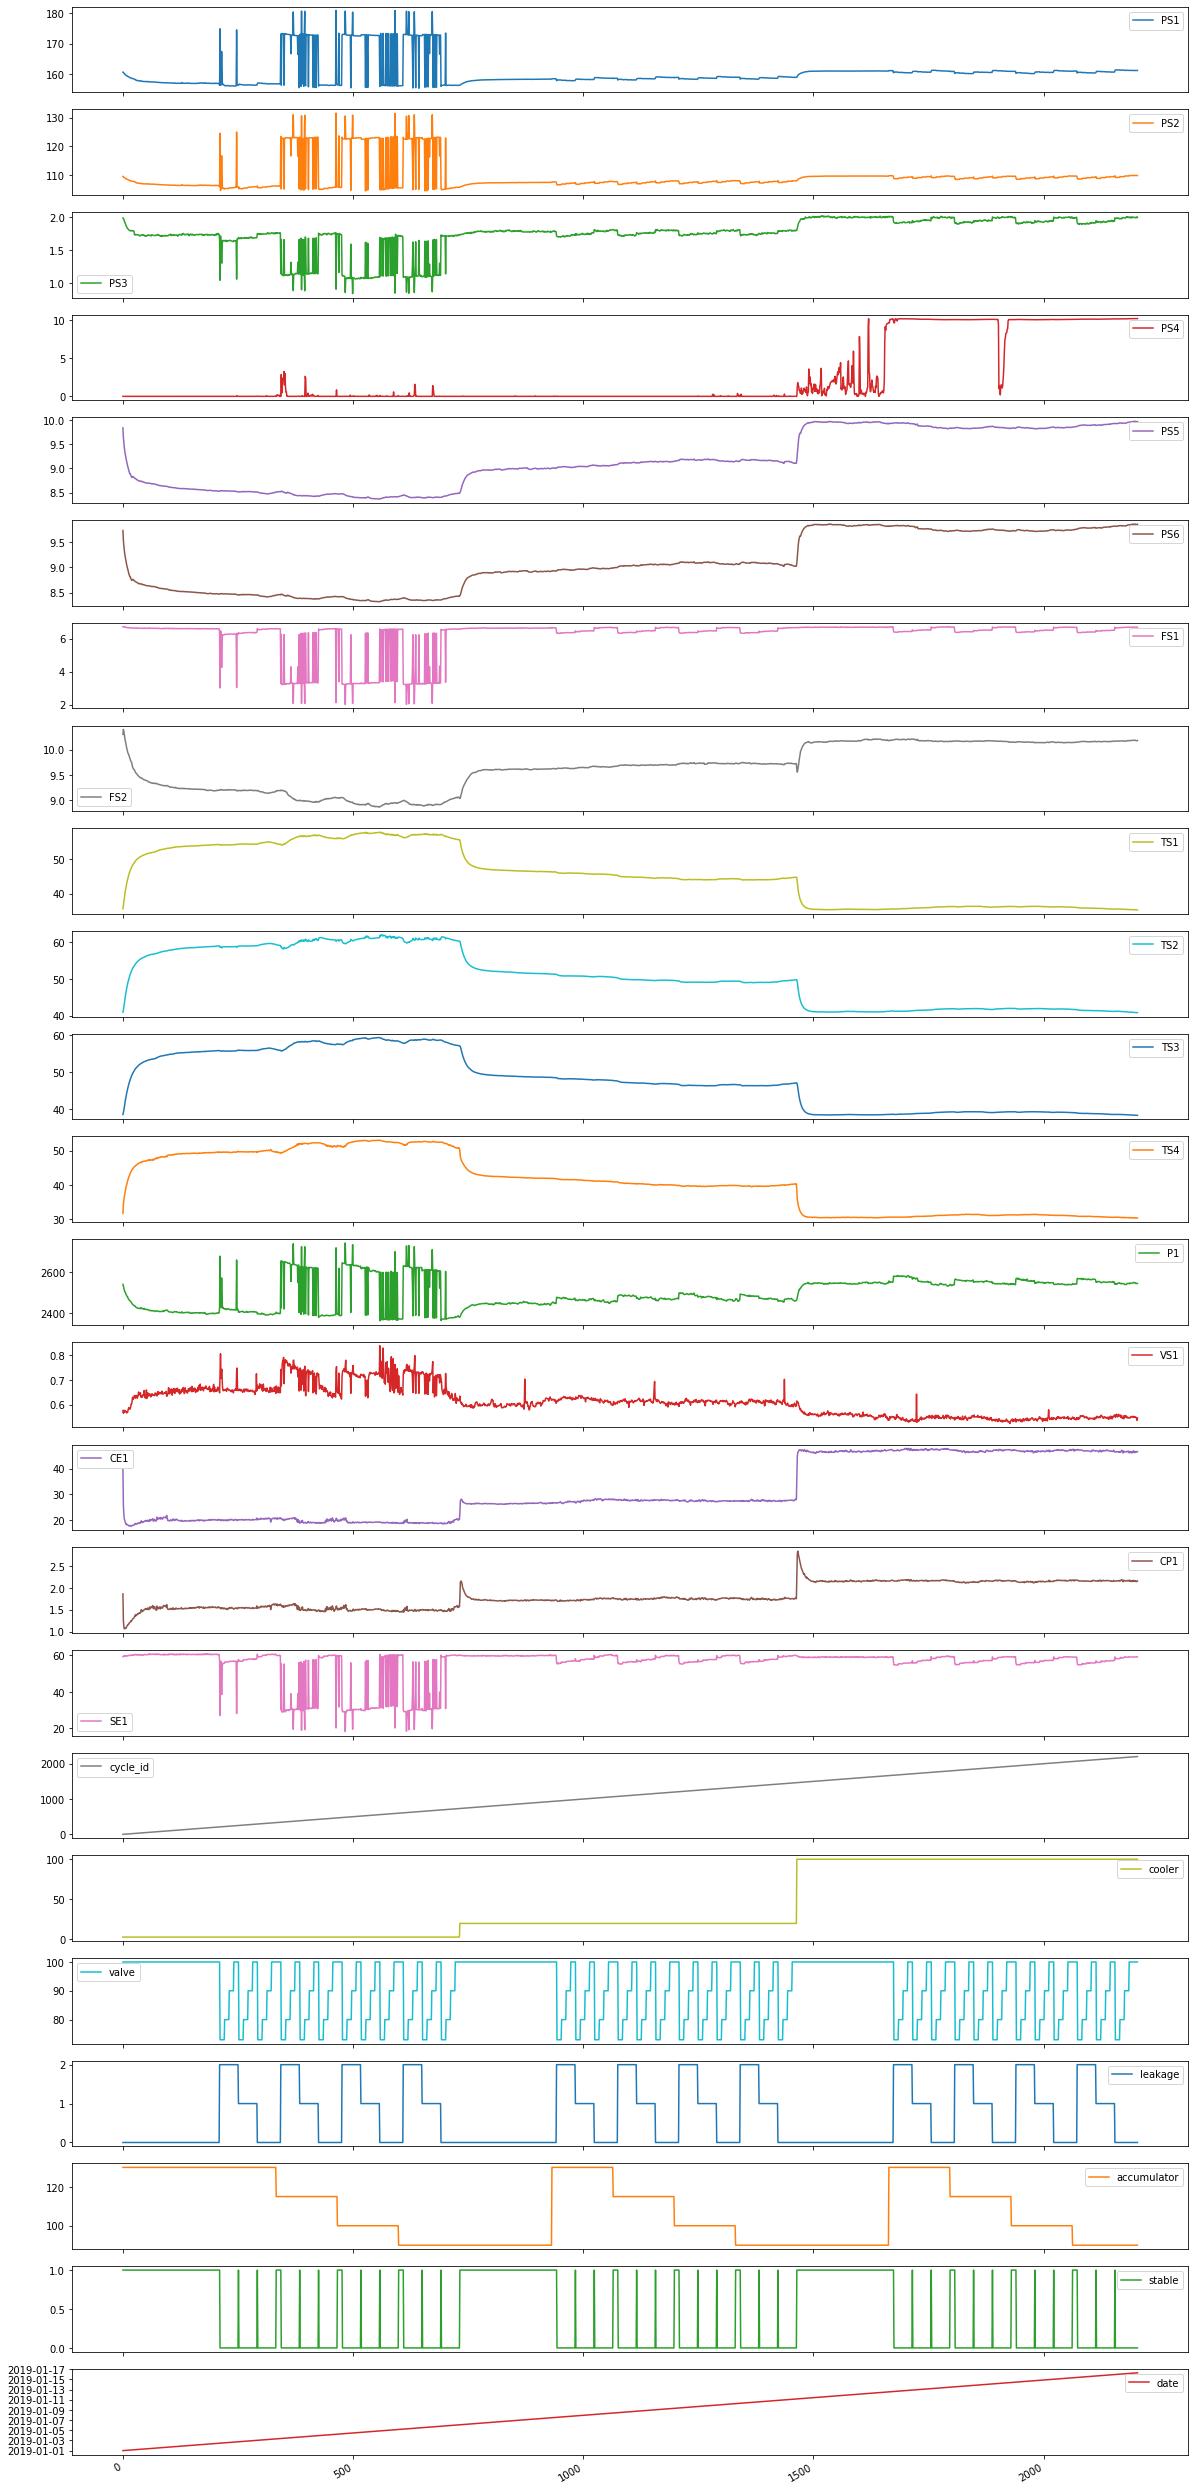

In [ ]:
import matplotlib.pyplot as plt
print(data.plot(subplots =True, sharex = True, figsize = (20,50)))


In [ ]:
df.to_excel("condition Hydraulic.xlsx")

In [ ]:
df.head()

,cycle_id,date,PS1,PS2,PS3,PS4,PS5,PS6,FS1,FS2,TS1,TS2,TS3,TS4,P1,VS1,CE1,CP1,SE1,cooler,valve,leakage,accumulator,stable
0,1,2019-01-01 00:00:00,160.673492,109.466914,1.991475,0.0,9.842170,9.728097,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,2538.929167,0.576950,39.601350,1.862750,59.157183,3,100,0,130,1
1,2,2019-01-01 00:10:00,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,2531.498900,0.565850,25.786433,1.255550,59.335617,3,100,0,130,1
2,3,2019-01-01 00:20:00,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,2519.928000,0.576533,22.218233,1.113217,59.543150,3,100,0,130,1
3,4,2019-01-01 00:30:00,160.188088,109.064807,1.946575,0.0,9.438827,9.337430,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,2511.541633,0.569267,20.459817,1.062150,59.794900,3,100,0,130,1
4,5,2019-01-01 00:40:00,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,2503.449500,0.577367,19.787017,1.070467,59.455267,3,100,0,130,1
